# 통신사 고객 이탈 데이터

- 라이브러리 임포트(import)  
- 데이터 가져오기(Loading the data)  
- 데이터 전처리(Data PreProcessing) : 카테고리 데이터, 더미특성 생성, 특성 추출 (feature engineering) 등  
- Train, Test  데이터셋 분할  
- 데이터 정규화(Normalizing the Data)  
- 모델 개발(Creating the Model)  
- 모델 성능 평가

### 라이브러리 임포트

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import multiprocessing
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Input
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # GPU 비활성화 (CPU 모드 강제)
num_cores = multiprocessing.cpu_count()

tf.config.threading.set_intra_op_parallelism_threads(num_cores)
tf.config.threading.set_inter_op_parallelism_threads(num_cores)

### 탐색적 데이터 분석 결과 탑재

In [2]:
# 구글 드라이브
# from google.colab import drive
# drive.mount('/content/drive')
#
# rootdir = "/content/drive/MyDrive/인공지능 사관학교/Coding/7월/data"

In [3]:
# read churn data
# df = pd.read_csv(rootdir + '/processed_churn_data.csv')
df = pd.read_csv('../data/processed_churn_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### 더미 특성 생성

In [6]:
cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod']

In [7]:
# One-hot encoding : get_dummies
dummies = pd.get_dummies(df[cols], drop_first=True)

In [8]:
# drop columns
df = df.drop(cols, axis=1)

In [9]:
# concat
df = pd.concat([df, dummies], axis=1)

In [10]:
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50

In [11]:
df.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True


###  Train, Test  데이터셋 분할

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [14]:
# train_test_splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [15]:
# shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4930, 23), (2113, 23), (4930,), (2113,))

### 데이터 정규화/스케일링(Normalizing/Scaling)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train[0]

array([0.        , 0.61111111, 0.02340637, 0.10662307, 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

###  모델 구성

In [19]:
model = keras.Sequential()
model.add(keras.layers.Input((23,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))

model.add(keras.layers.Dense(1, activation='sigmoid'))

### 모델 확인

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,809 (30.50 KB)

 Trainable params: 7,809 (30.50 KB)

 Non-trainable params: 0 (0.00 B)

#### 모델 컴파일 – 이진 분류 모델

In [21]:
model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
)

- 모델 컴파일 – 다중 분류 모델  
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


- 모델 컴파일 – 예측 모델
model.compile(optimizer='adam', loss='mse')

### 모델 훈련(학습) 하기

In [22]:
from tqdm.keras import TqdmCallback

history = model.fit(
                X_train,
                y_train,
                batch_size=32,
                epochs=30,
                validation_data=(X_test, y_test),
                verbose=0,
                callbacks=[TqdmCallback()]
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

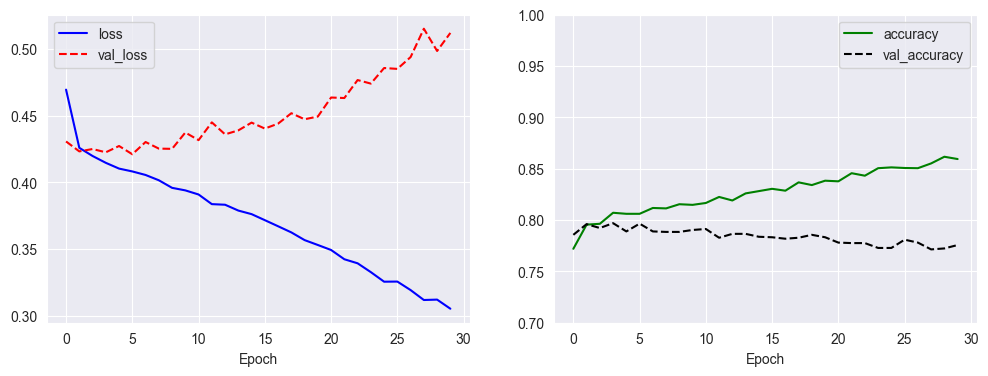

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

### 평가

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"테스트 손실: {loss:.4f}")
print(f"테스트 정확도: {accuracy:.4f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7818 - loss: 0.5009
테스트 손실: 0.5119
테스트 정확도: 0.7757


In [25]:
from sklearn.metrics import classification_report
y_pred_proba = model.predict(X_test)
y_pred_proba


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step


array([[2.9153395e-01],
       [1.3646210e-02],
       [3.8362667e-04],
       ...,
       [1.3338192e-01],
       [1.2170460e-01],
       [6.7423046e-01]], dtype=float32)

In [26]:
# 확률을 0 또는 1로 변환 (임계값 0.5)
y_pred = (y_pred_proba > 0.5).astype(int)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1556
           1       0.58      0.51      0.55       557

    accuracy                           0.78      2113
   macro avg       0.71      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



### 모델 훈련(학습) - 조기종료

In [28]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

과적합 방지

In [29]:
model2 = keras.Sequential()
model2.add(Input(shape=(23,)))
# model2.add(Dense(128, activation='relu'))
# model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,809 (30.50 KB)

 Trainable params: 7,809 (30.50 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
early_stop = EarlyStopping(monitor='val_loss',
                          mode='min',
                          verbose=0,
                           patience=25)

In [31]:
check_point = ModelCheckpoint('models/churn_best_model.h5',
                              monitor='val_loss',
                              mode='min',
                              verbose=1,
                              save_best_only=True)

In [32]:
model2.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
)

In [33]:
history2 = model2.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=0,
    callbacks=[TqdmCallback(), early_stop, check_point]
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]


Epoch 1: val_loss improved from inf to 0.47636, saving model to models/churn_best_model.h5



Epoch 2: val_loss improved from 0.47636 to 0.44517, saving model to models/churn_best_model.h5



Epoch 3: val_loss improved from 0.44517 to 0.43838, saving model to models/churn_best_model.h5



Epoch 4: val_loss did not improve from 0.43838

Epoch 5: val_loss improved from 0.43838 to 0.43817, saving model to models/churn_best_model.h5



Epoch 6: val_loss improved from 0.43817 to 0.43498, saving model to models/churn_best_model.h5



Epoch 7: val_loss improved from 0.43498 to 0.42641, saving model to models/churn_best_model.h5



Epoch 8: val_loss did not improve from 0.42641

Epoch 9: val_loss did not improve from 0.42641

Epoch 10: val_loss improved from 0.42641 to 0.42283, saving model to models/churn_best_model.h5



Epoch 11: val_loss did not improve from 0.42283

Epoch 12: val_loss did not improve from 0.42283

Epoch 13: val_loss did not improve from 0.42283

Epoch 14: val_loss did not improve from 0.42283

Epoch 15: val_loss did not improve from 0.42283

Epoch 16: val_loss did not improve from 0.42283

Epoch 17: val_loss did not improve from 0.42283

Epoch 18: val_loss did not improve from 0.42283

Epoch 19: val_loss did not improve from 0.42283

Epoch 20: val_loss did not improve from 0.42283

Epoch 21: val_loss did not improve from 0.42283

Epoch 22: val_loss improved from 0.42283 to 0.42159, saving model to models/churn_best_model.h5



Epoch 23: val_loss did not improve from 0.42159

Epoch 24: val_loss did not improve from 0.42159

Epoch 25: val_loss did not improve from 0.42159

Epoch 26: val_loss improved from 0.42159 to 0.41897, saving model to models/churn_best_model.h5



Epoch 27: val_loss did not improve from 0.41897

Epoch 28: val_loss did not improve from 0.41897

Epoch 29: val_loss did not improve from 0.41897

Epoch 30: val_loss did not improve from 0.41897

Epoch 31: val_loss did not improve from 0.41897

Epoch 32: val_loss did not improve from 0.41897

Epoch 33: val_loss did not improve from 0.41897

Epoch 34: val_loss did not improve from 0.41897

Epoch 35: val_loss did not improve from 0.41897

Epoch 36: val_loss did not improve from 0.41897

Epoch 37: val_loss did not improve from 0.41897

Epoch 38: val_loss did not improve from 0.41897

Epoch 39: val_loss did not improve from 0.41897

Epoch 40: val_loss did not improve from 0.41897

Epoch 41: val_loss did not improve from 0.41897

Epoch 42: val_loss did not improve from 0.41897

Epoch 43: val_loss did not improve from 0.41897

Epoch 44: val_loss did not improve from 0.41897

Epoch 45: val_loss did not improve from 0.41897

Epoch 46: val_loss did not improve from 0.41897

Epoch 47: val_loss 

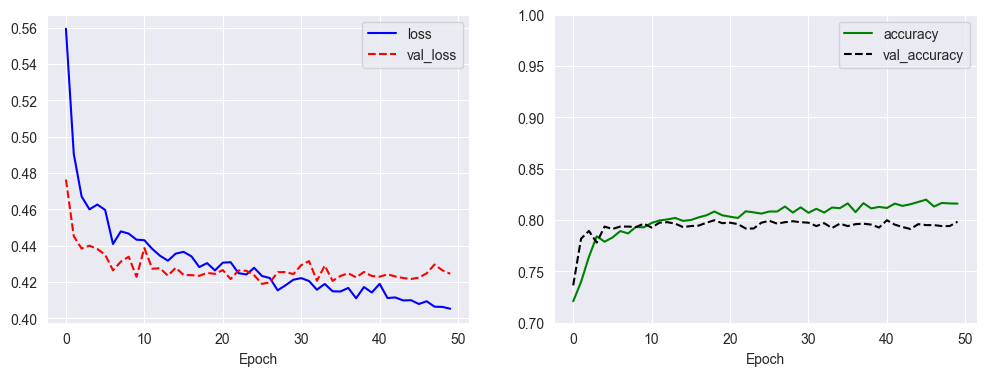

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], 'b-', label='loss')
plt.plot(history2.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], 'g-', label='accuracy')
plt.plot(history2.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [35]:
loss, accuracy = model2.evaluate(X_test, y_test)

print(f"테스트 손실: {loss:.4f}")
print(f"테스트 정확도: {accuracy:.4f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.8054 - loss: 0.4261
테스트 손실: 0.4245
테스트 정확도: 0.7984


---


# "실습"

1. units 수를 늘려 테스트
    - Oferffitting 방지를 위해 regulation 과 dropout 적용

